# 6.2 Exploring relationships Task

## Import Libraries and Data

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Check matplotlib version 

matplotlib.__version__

'3.9.2'

In [6]:
# This option ensures the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Define path

path = r'C:\Users\lefev\Documents\Data Analytics Course\Achievement 6'

In [8]:
# Import data

df = pd.read_csv(os.path.join(path, 'Data', 'combined_happiness_data.csv'), index_col=False)

## Double check values

In [10]:
# Check for missing values

df.isnull().sum()

Happiness Rank                  312
Country                         312
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
Year                              0
Overall rank                    470
Country or region               470
dtype: int64

In [11]:
print(df.columns)

Index(['Happiness Rank', 'Country', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year', 'Overall rank',
       'Country or region'],
      dtype='object')


## Rename Overall rank to Happiness Rank, and Country or region to Country

In [13]:
# First combine the values from both rank columns

df['Happiness Rank'] = df['Happiness Rank'].combine_first(df['Overall rank'])
df = df.drop('Overall rank', axis=1)

In [14]:
# Then combine the values from both country columns

df['Country'] = df['Country'].combine_first(df['Country or region'])
df = df.drop('Country or region', axis=1)

In [15]:
# Verify the results

print("\nUpdated columns:")
print(df.columns)


Updated columns:
Index(['Happiness Rank', 'Country', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')


In [16]:
# Check some data

print("\nSample data:")
print(df[['Year', 'Country', 'Happiness Rank']].head())


Sample data:
   Year      Country  Happiness Rank
0  2015  Switzerland             1.0
1  2015      Iceland             2.0
2  2015      Denmark             3.0
3  2015       Norway             4.0
4  2015       Canada             5.0


In [17]:
# Check for missing values

df.isnull().sum()

Happiness Rank                  0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

## Dataframe is good to go

## Question 2, pick out correct variables

In [20]:
 # Drop 'Year' and 'Country' columns

df_corr = df.drop(['Year', 'Country'], axis=1)

## Question 3, create a correlation matrix heatmap (colored)

In [22]:
df_corr.corr()

Happiness Rank     Score  GDP per capita  \
Happiness Rank                      1.000000 -0.992066       -0.794791   
Score                              -0.992066  1.000000        0.789284   
GDP per capita                     -0.794791  0.789284        1.000000   
Social support                     -0.644842  0.648799        0.585966   
Healthy life expectancy            -0.743655  0.742456        0.784338   
Freedom to make life choices       -0.537942  0.551258        0.340511   
Generosity                         -0.206222  0.223577        0.121173   
Perceptions of corruption          -0.230202  0.254329        0.127533   

                              Social support  Healthy life expectancy  \
Happiness Rank                     -0.644842                -0.743655   
Score                               0.648799                 0.742456   
GDP per capita                      0.585966                 0.784338   
Social support                      1.000000                 0.572650   
Healthy life expectancy             0.572650                 1.000000   
Freedom to make life choices        0.420361                 0.340745   
Generosity                          0.192008                 0.092768   
Perceptions of corruption          -0.110926                 0.131581   

                              Freedom to make life choices  Generosity  \
Happiness Rank                                   -0.537942   -0.206222   
Score                                             0.551258    0.223577   
GDP per capita                                    0.340511    0.121173   
Social support                                    0.420361    0.192008   
Healthy life expectancy                           0.340745    0.092768   
Freedom to make life choices                      1.000000    0.358228   
Generosity                                        0.358228    1.000000   
Perceptions of corruption                         0.325491    0.131638   

                              Perceptions of corruption  
Happiness Rank                                -0.230202  
Score                                          0.254329  
GDP per capita                                 0.127533  
Social support                                -0.110926  
Healthy life expectancy                        0.131581  
Freedom to make life choices                   0.325491  
Generosity                                     0.131638  
Perceptions of corruption                      1.000000

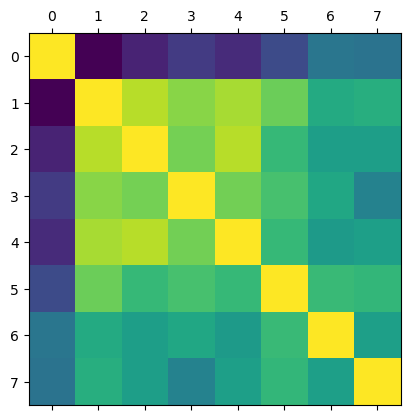

In [23]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_corr.corr())
plt.show()

In [24]:
# Add labels and legend and change size

# Create a heatmap with labels and legend
plt.figure(figsize=(12, 10))  # Make the figure a bit larger

# Create heatmap with annotations
plt.matshow(df_corr.corr(), cmap='YlGnBu')  # You can keep your current colormap by omitting this

# Add colorbar/legend
plt.colorbar(label='Correlation Coefficient')

# Add labels
labels = df_corr.columns
plt.xticks(range(len(labels)), labels, rotation=45, ha='left')
plt.yticks(range(len(labels)), labels)

# Add title
plt.title('Correlation Matrix of Happiness Factors', pad=20)

Text(0.5, 1.0, 'Correlation Matrix of Happiness Factors')

C:\Users\lefev\AppData\Local\Temp\ipykernel_2324\1105449630.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

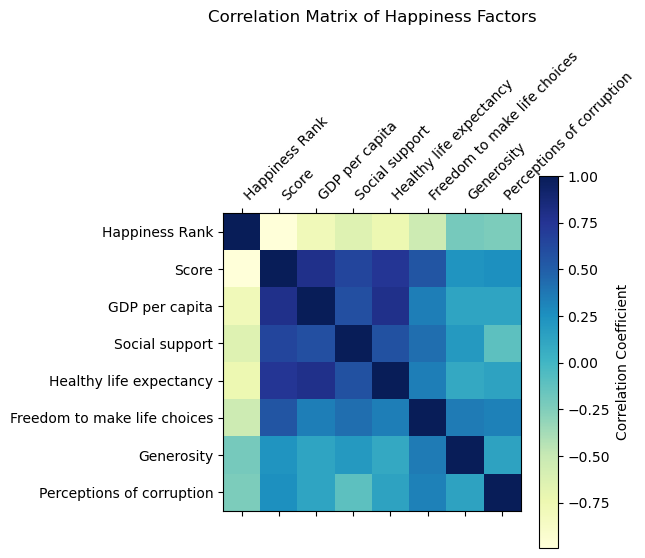

In [25]:
# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### This is tricky as it looks inverted for the Happiness Rank because in the dataset, a lower rank number (like 1) actually indicates a happier country, while a higher rank number indicates a less happy country. This creates negative correlations that might seem counterintuitive at first glance.

### Happiness Rank vs Score: Strong negative correlation (-0.99)
### This makes sense: as the score increases, the rank number decreases (gets better). A country with rank 1 has the highest happiness score

### It could be better to focus on the Score correlation as it keeps a positive correlation for all other requirements

### The Happiness of a country depends most on GDP per capita, then Healthy life expectancy, Social support, Freedom to make life choices, perceptions of corruption and generosity

### Interesting to see a strong correlation between GDP per Capita and Healthy life expectancy. As well GDP to Social support

## Question 4, create a scatter plot of strongest correlations

In [28]:
# Create a scatterplot for the "GDP per capita" and "score" columns in seaborn

sns.lmplot(x = 'Score', y = 'GDP per capita', data = df_corr)

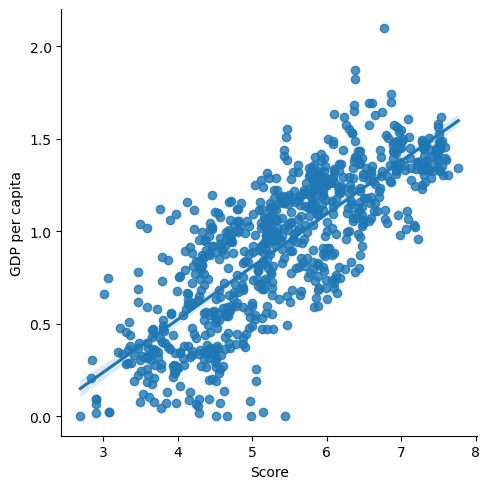

In [29]:
plt.show()

## This scatterplot shows the strong correlation between an input of a survey taker who views their GDP per capita as a strong variable to Dystopia to the ultimate Score of a country's happiness. The greater they rank GdP per capita as an influence, the happier the country. 

## Question 5, create a pair plot

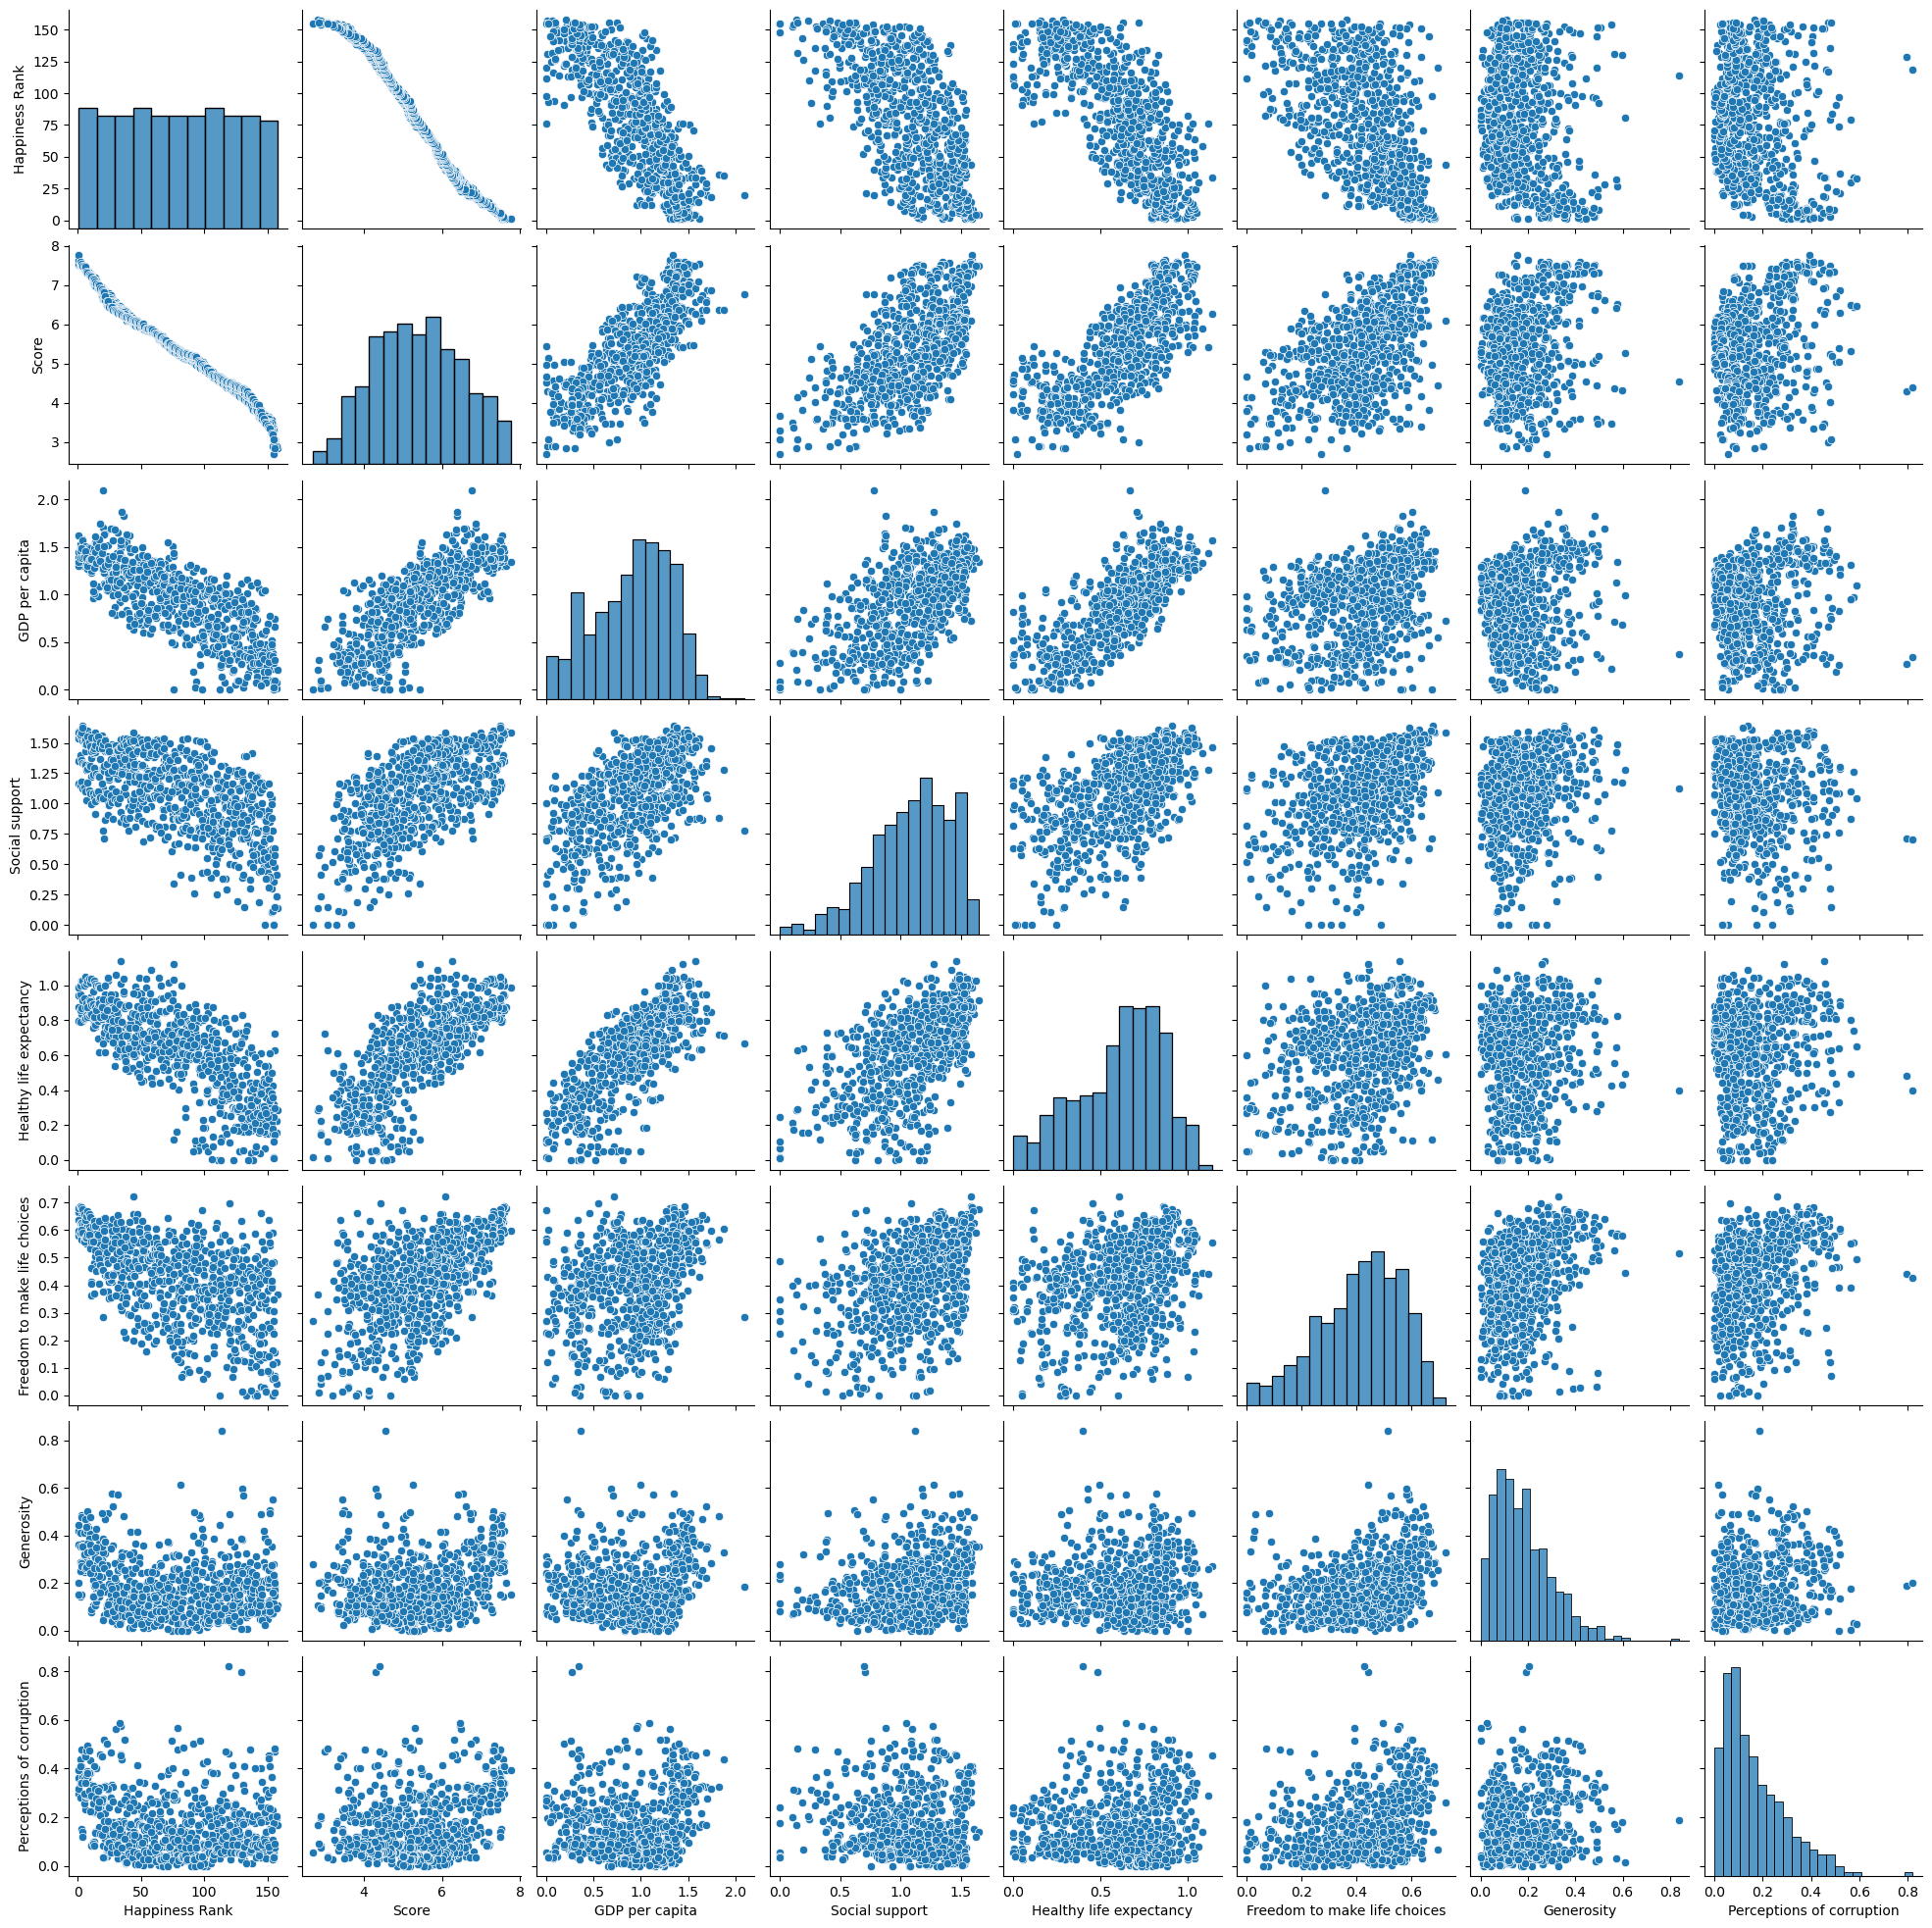

In [32]:
# Create pairplot

sns.pairplot(df_corr)
plt.show()

### I'm not sure if there are any insights not already found. All sections show more visually what was found in the heatmap. Interesting to see how Happiness Rank/Score are .99 correlated shown. 

### Maybe one interesteing thing is you see a clear outlier of 2 points on perceptions of corruption, and there is one clear outlier on Generosity. It might be linked to the 0 inputs. Could be interesting to explore more. 

## Question 6, create categorical plot

In [58]:
# First create the categories based on Score

df['Happiness Level'] = pd.cut(df['Score'], 
                              bins=3, 
                              labels=['Low', 'Medium', 'High'])

In [60]:
# Create a categorical plot using seaborn

sns.catplot(data=df, 
            x='Happiness Level',
            y='GDP per capita',
            kind='box',  # you can try: 'violin', 'bar', 'swarm', 'box'
            height=6,
            aspect=1.5)

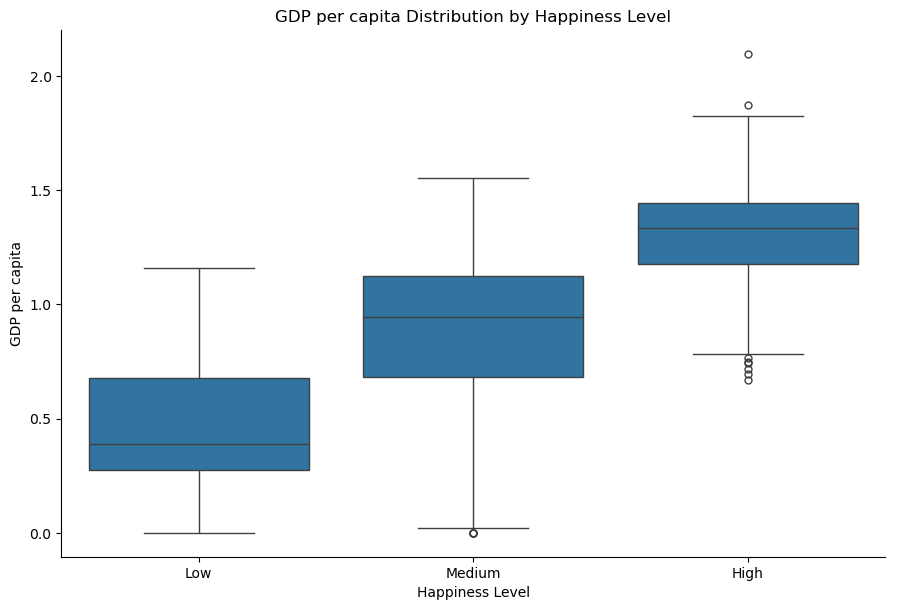

In [62]:
plt.title('GDP per capita Distribution by Happiness Level')
plt.show()

## Question 7, what can you answer from your original questions?

### 4. What is the relationship between GDP and happiness scores? -  The relationship between GDP and happiness scores shows a strong positive correlation (0.79), indicating that higher GDP generally corresponds with higher happiness scores.
### 
5. Do wealthier countries consistently rank higher in happiness - Yes, wealthier countries consistently rank higher in happiness, as shown by the strong negative correlation (-0.79) between GDP per capita and Happiness Rank (where lower ranks indicate higher happiness).

### 7. How strongly does social support correlate with happiness? - Social support shows a strong positive correlation (0.65) with happiness scores, indicating it's an important factor in overall happiness.
### 8. What's the relationship between life expectancy and happiness? - Healthy life expectancy has a strong positive correlation (0.74) with happiness scores, suggesting countries with longer life expectancy tend to be happier.

### 9. Does freedom to make life choices significantly impact happiness scores? - Freedom to make life choices has a moderate positive correlation (0.55) with happiness scores, indicating it has a significant but not dominant impact.

### 10. Which factors are the strongest predictors of happiness? - The strongest predictors of happiness are GDP per capita (0.79), healthy life expectancy (0.74), and social support (0.65), in order of correlation strength.
### 11.Can we predict a country's happiness score based on its economic and social indicators? - Yes, given the strong correlations between these indicators and happiness scores, particularly GDP per capita, healthy life expectancy, and social support, we can make reasonable predictions of a country's happiness score based on these factors.






# Question 8, define a Hypothesis

## "The impact of GDP per capita on happiness scores may have diminishing returns after reaching a certain threshold, with social support and life expectancy becoming more significant predictors of happiness in higher-income countries."